In [5]:
##a cell for import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import datetime

In [6]:
##1) load the data
df = pd.read_csv('building_permits.csv')
df_2022 = pd.read_csv('Building_Permits_in_2022.csv')
df_2023 = pd.read_csv('BpData_after_cleaning_with_Nan.csv')

In [7]:
df_construction =  copy.deepcopy(df) #pd.DataFrame({})
df_construction = df_construction.drop(df_construction[df_construction['PERMIT_TYPE_NAME'] != 'CONSTRUCTION'].index)
# print(df_construction.head())

Num of year out of 2022 and 2023: 0 	(0 means the issue time period is not out of year 2023)


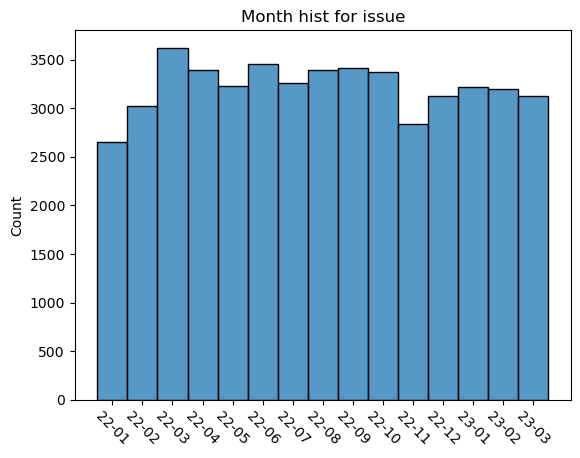

It seems that the month distribution is equal.


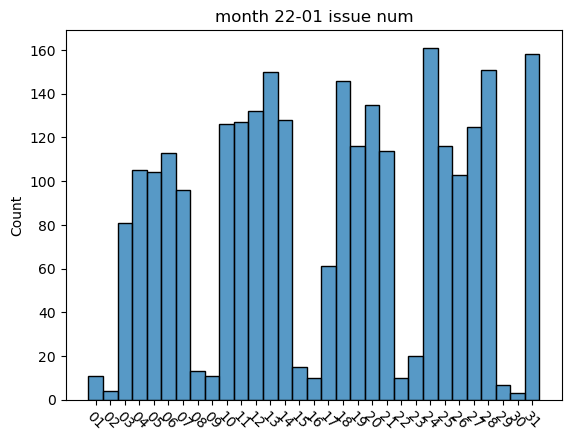

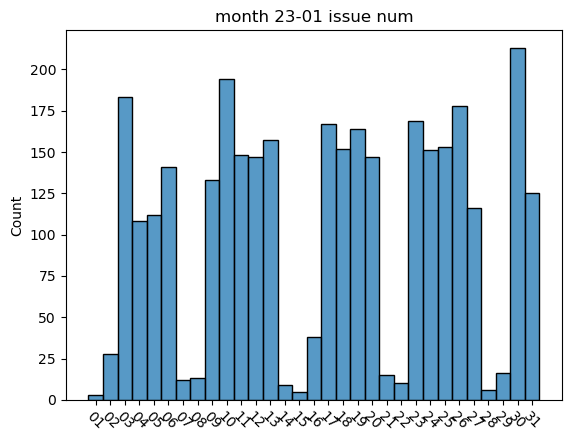

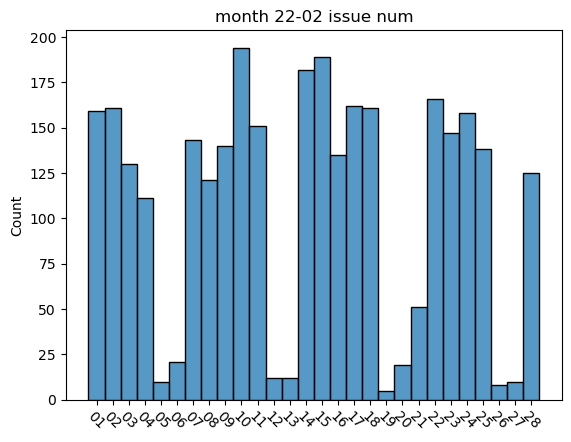

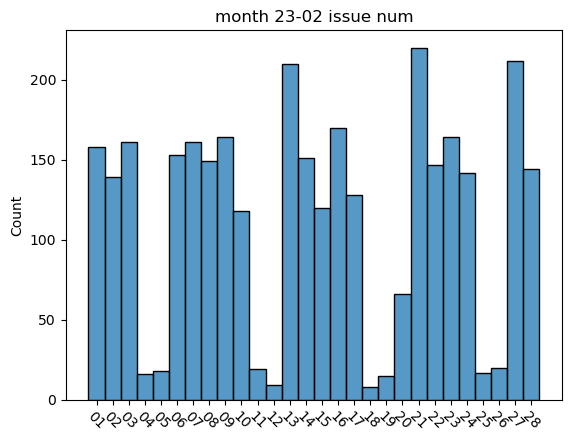

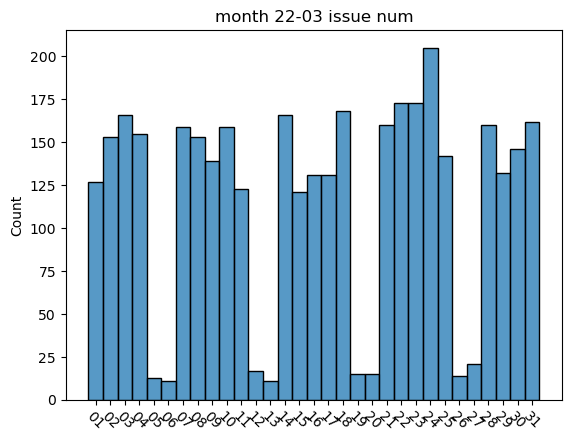

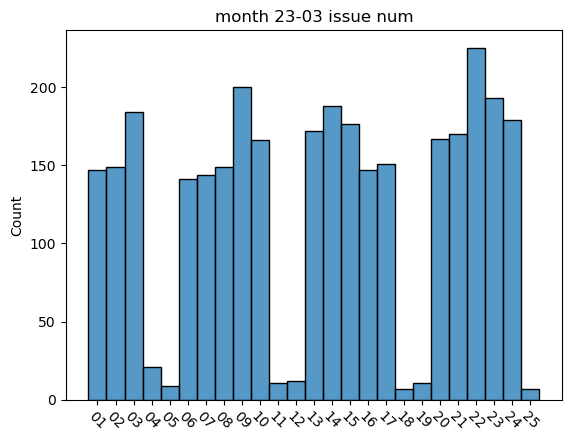

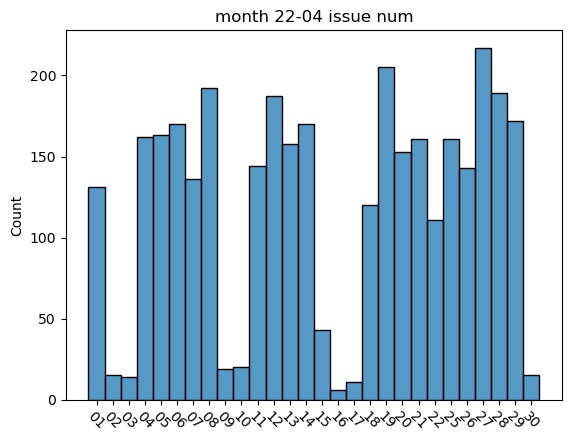

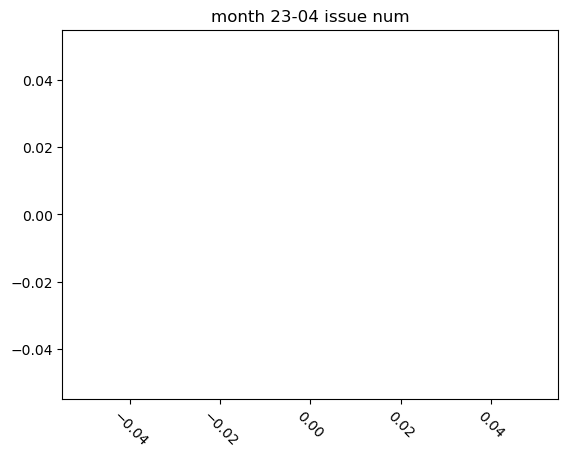

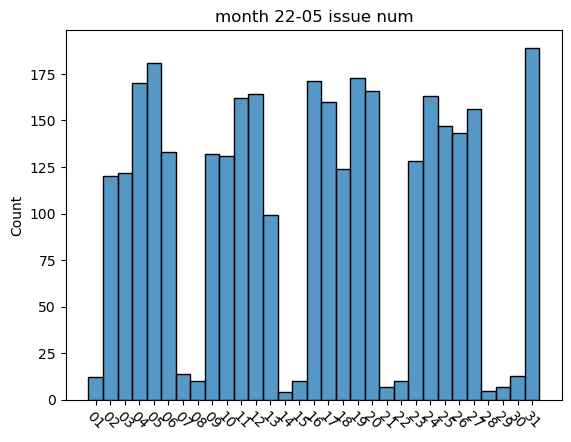

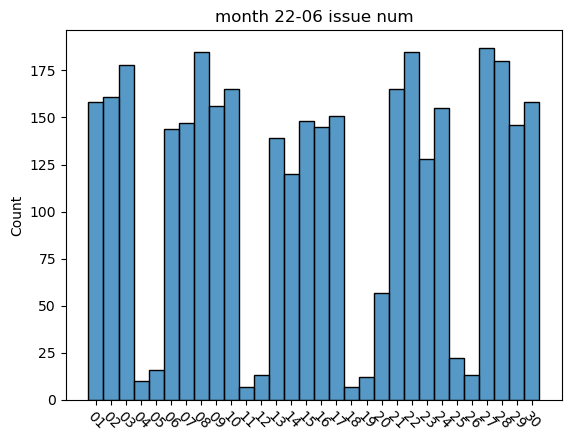

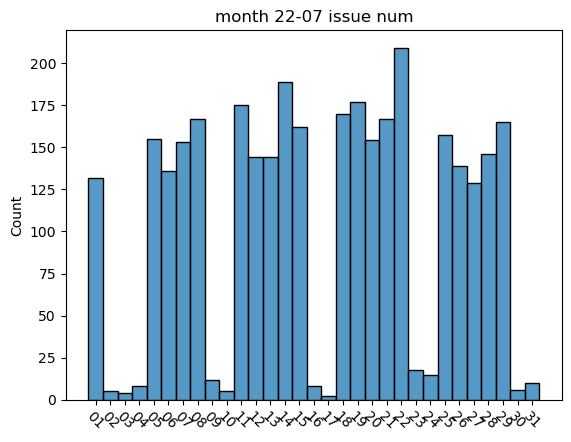

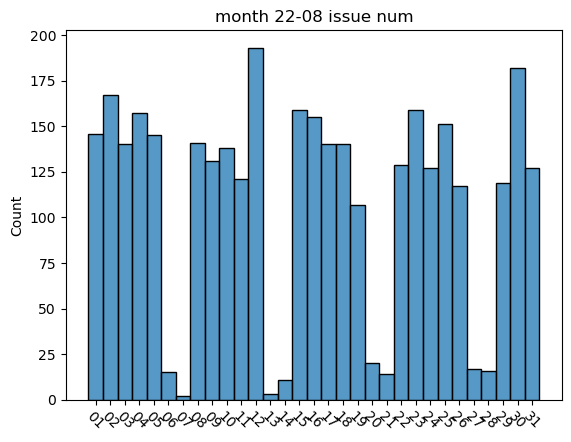

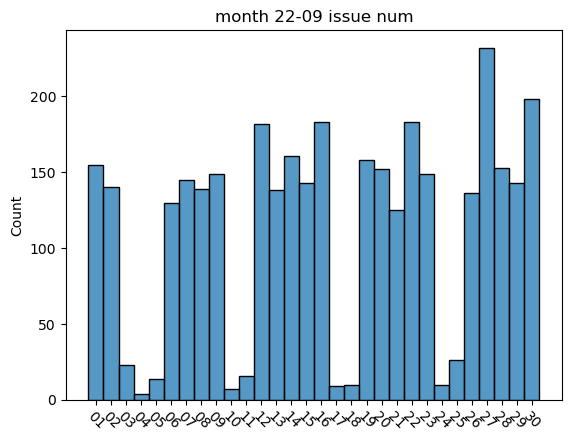

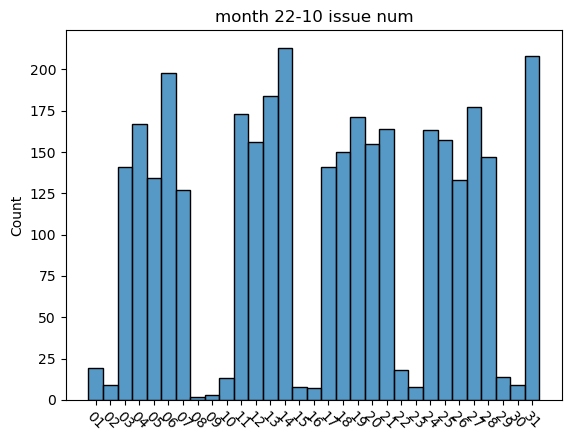

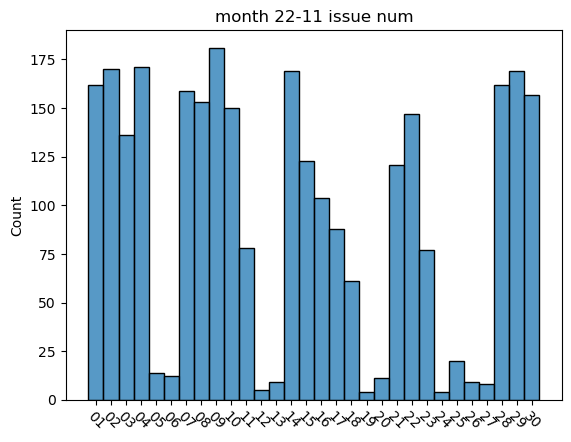

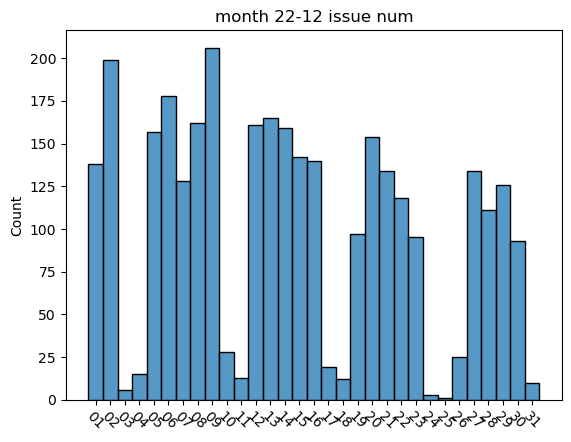

Comparing the pictures we finally find that all days with few issue numbers seems all weekends, so that there may be fewer application than weekdays.


In [8]:
##2) we first observeing the data through histogram. 

## 2.1 ISSUE_DATE, by day, the purpose is to see if there are some trends in the issue date, may be the issue of constructions are decreasing, or maybe there are some other patterns.
df_issuedate = copy.deepcopy(df['ISSUE_DATE'])
dt_issue, dt_issue_month,dt_issue_monthsliced, count = [], [], {}, 0
def yearcheck(dt_issue, count = 0, name = 'issue'): #check year see if in 2022 or 2023
    for i in dt_issue:
        if i[0:4] != '2023' and i[0:4] != '2022':
            count += 1
    print('Num of year out of 2022 and 2023:',count,f'\t(0 means the {name} time period is not out of year 2023)')    # 0 means the time period is not out of year 2023

def datetreat(df_issuedate, dt_issue=[], dt_issue_month=[], dt_issue_monthsliced={}):   #put date processes in a function for easy treat with other date data.
    for i in df_issuedate:  # accurate to date
        dt_issue.append(i[0:10])
    for i in range(len(df_issuedate)):  #accurate to month
        dt_issue_month.append(df_issuedate[i][2:7])
    dt_issue.sort()
    dt_issue_month.sort()
    # print(dt_issue[0:5],'\n',dt_issue_month[0:5])     #checkline
    for i in ['01','02','03','04','05','06','07','08','09','10','11','12']: #initialize the dt_issue_monthsliced
        dt_issue_monthsliced['-'.join(['22',i])] = []
        if i == '01' or i == '02' or i == '03' or i =='04':
            dt_issue_monthsliced['-'.join(['23',i])] = []
        # print(dt_issue_monthsliced)    #chekline
# datetreat(df_issuedate, dt_issue=[], dt_issue_month=[], dt_issue_monthsliced)  #checkline
    for i in range(len(dt_issue)):  #now get the 2022 and 2023 month slice
        dt_issue_monthsliced[dt_issue_month[i]].append(dt_issue[i][8:10])
    # print(dt_issue,'\n', dt_issue_month,'\n',dt_issue_monthsliced)
    return dt_issue, dt_issue_month, dt_issue_monthsliced

dt_issue, dt_issue_month, dt_issue_monthsliced = datetreat(df_issuedate, dt_issue, dt_issue_month, dt_issue_monthsliced)
yearcheck(dt_issue, count, name = 'issue')

def month_show(dt_issue_month, name='issue'): #easy function for month_show histgram
    sns.histplot(data = dt_issue_month)
    plt.title("Month hist for {0}".format(name)) 
    plt.xticks(rotation=-45)
    plt.show()# we found that there's only three month's data, and the number of construction-site may be decreasing?(the date data is apprently not enough)
month_show(dt_issue_month, name = 'issue')
print("It seems that the month distribution is equal.")
for key in dt_issue_monthsliced:
    sns.histplot(data = dt_issue_monthsliced[key])
    plt.title(f'month {key} issue num')
    plt.xticks(rotation=-45)
    plt.show()
    # print(key)
# print(dt_issue_monthsliced['22-01'])
print('Comparing the pictures we finally find that all days with few issue numbers seems all weekends, so that there may be fewer application than weekdays.')

Num of year out of 2022 and 2023: 0 	(0 means the created time period is not out of year 2023)


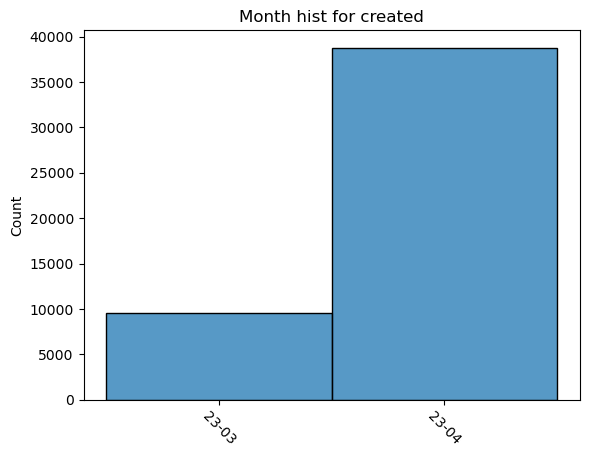

we found that there's only two months' data in created date.
The CREATED_DATE are all in one time 2023-04-17 10:36:16+00:00 and 2023-03-28 10:37:25+00:00.


In [9]:
## 2.2 The same as before, we treat CREATED_DATE, LAST_EDITED_DATE
df_CREATED_DATE = copy.deepcopy(df['CREATED_DATE'])
yearcheck(df_CREATED_DATE,0,'created')
dt_create, dt_create_month, dt_create_monthsliced = datetreat(df_CREATED_DATE, [], [], {})
month_show(dt_create_month, 'created')
print("we found that there's only two months' data in created date.")

count = 0
for i in df_CREATED_DATE:
    if i != df_CREATED_DATE[0] and i != df_CREATED_DATE[len(df_CREATED_DATE)-1]:
        count += 1
if count == 0:
    print(f'The CREATED_DATE are all in one time {df_CREATED_DATE[0]} and {df_CREATED_DATE[len(df_CREATED_DATE)-1]}.')
# print(count)

Num of year out of 2022 and 2023: 0 	(0 means the LASTMODIFIEDDATE time period is not out of year 2023)


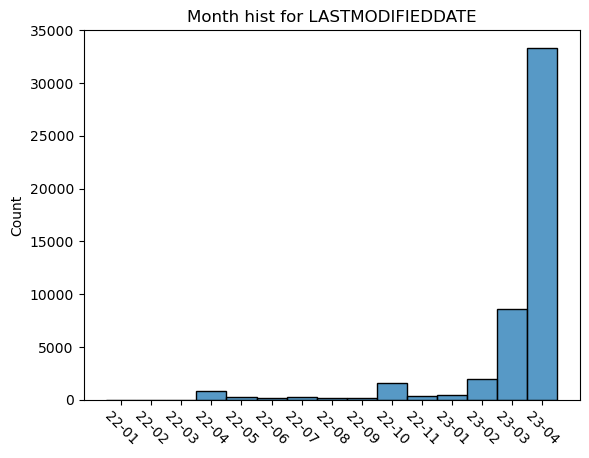

we found that the last modifieddate data is apparently increasing in three month.


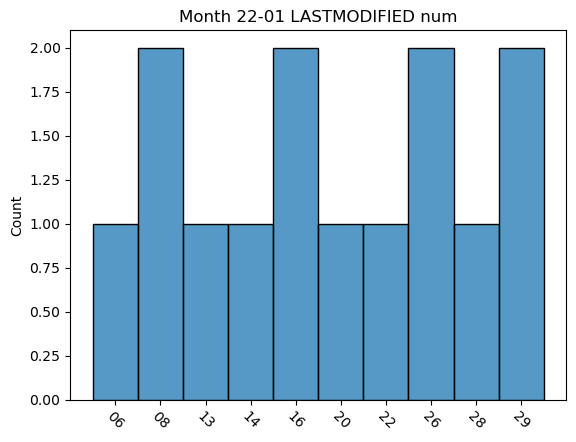

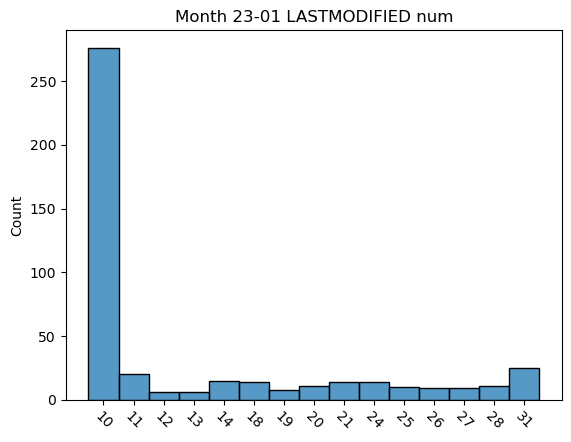

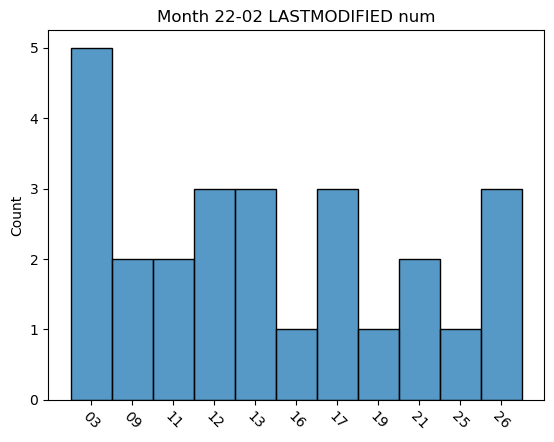

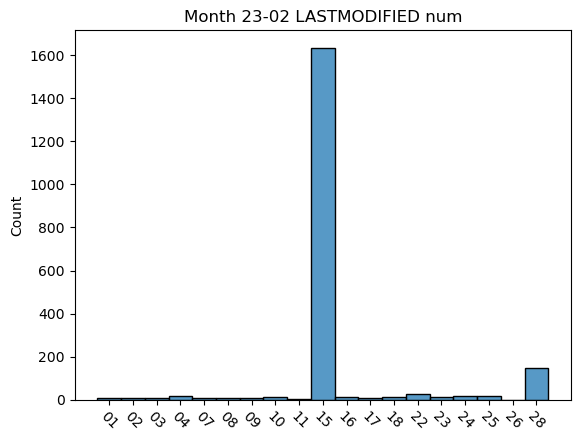

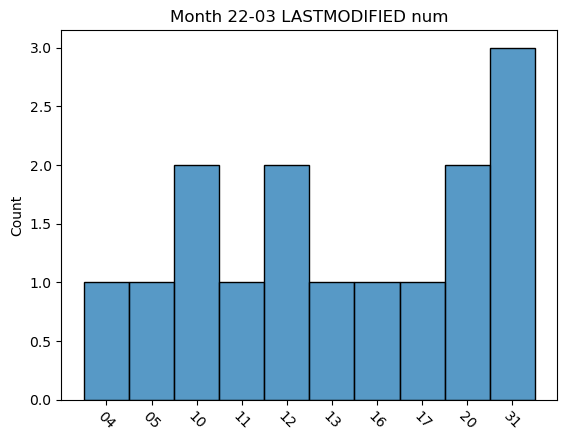

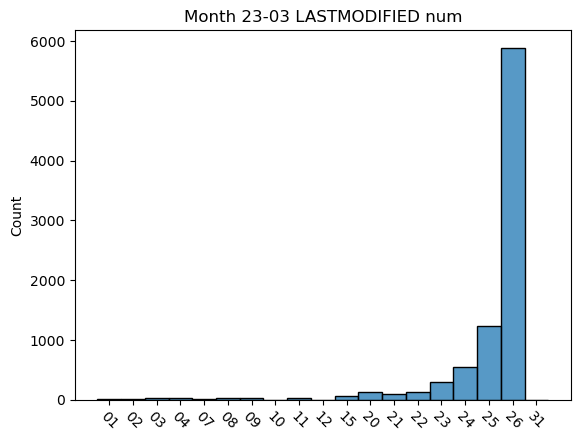

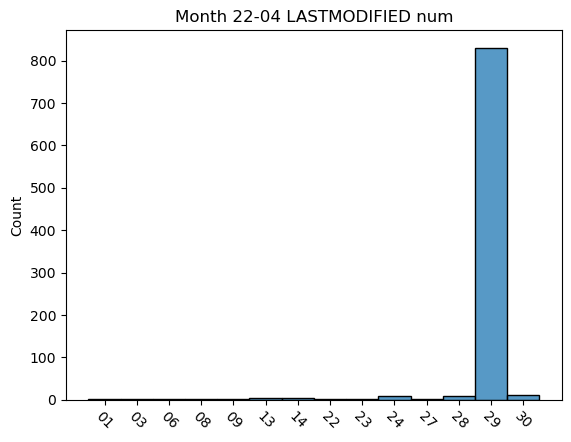

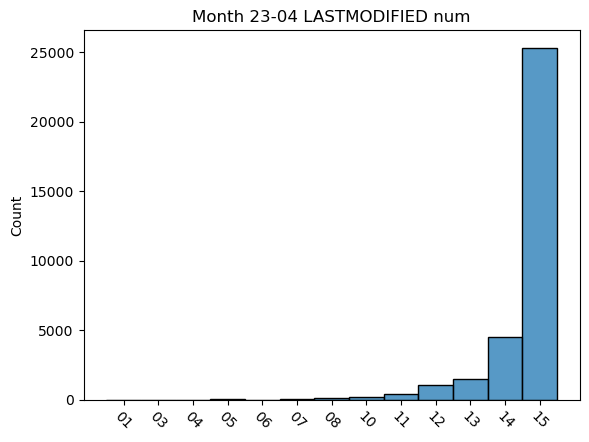

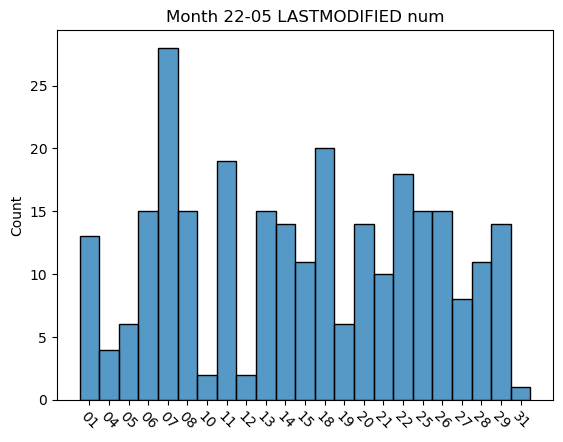

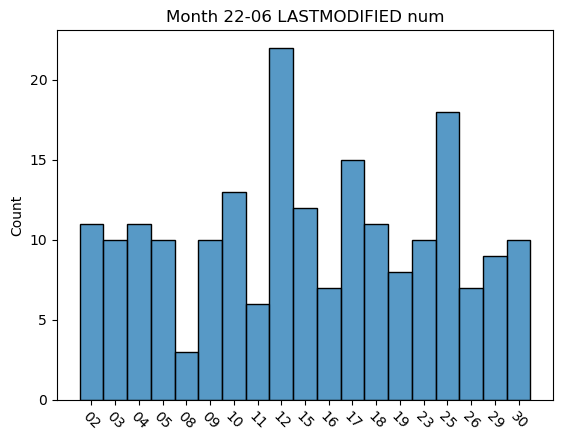

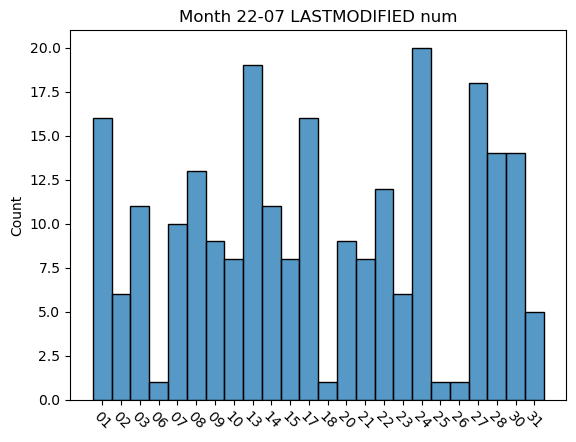

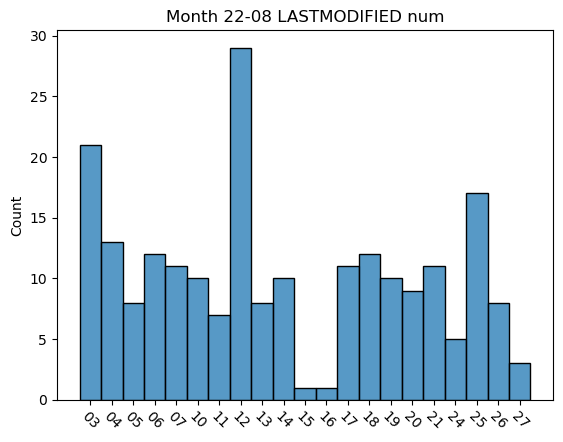

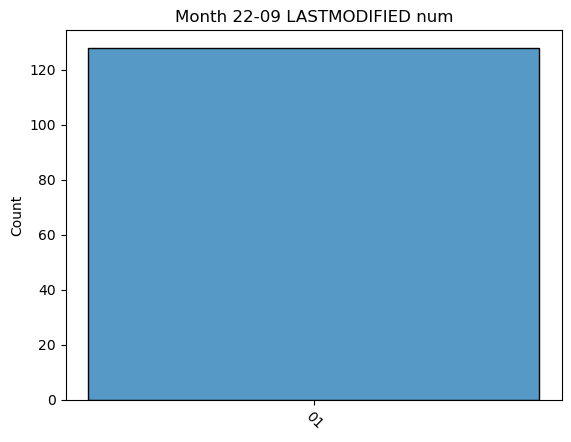

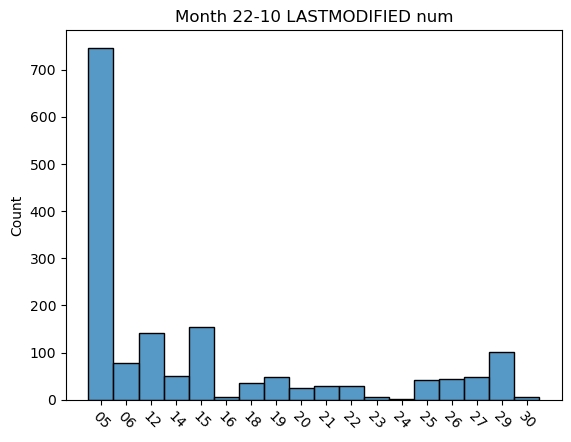

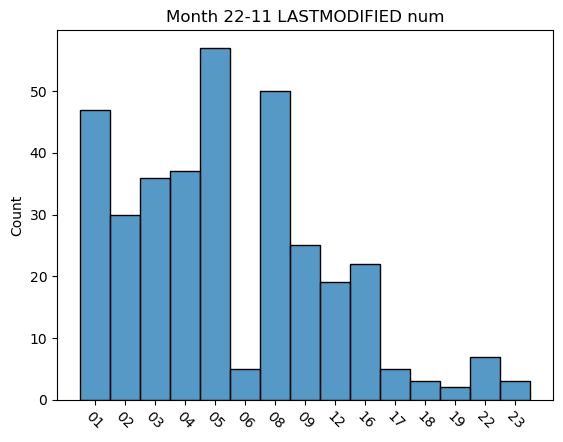

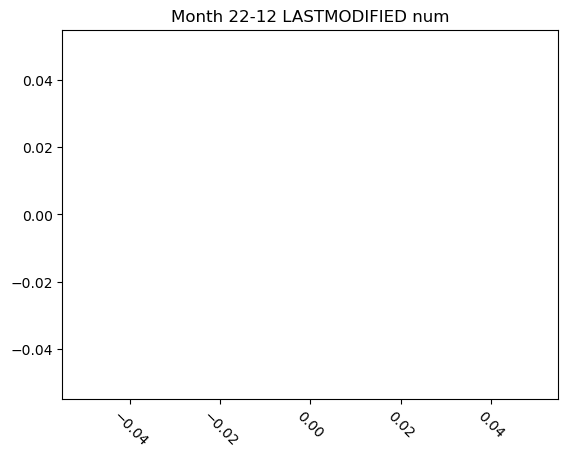

There seems no patterns in the LASTMODIFIEDDATE.


In [10]:
## 2.3 The same as before, we treat LASTMODIFIEDDATE
df_LASTMODIFIEDDATE = copy.deepcopy(df['LASTMODIFIEDDATE'])
yearcheck(df_LASTMODIFIEDDATE,0,'LASTMODIFIEDDATE')
dt_LASTMODIFIEDDATE, dt_LASTMODIFIEDDATE_month, dt_LASTMODIFIEDDATE_monthsliced = datetreat(df_LASTMODIFIEDDATE, [], [], {})
month_show(dt_LASTMODIFIEDDATE_month, 'LASTMODIFIEDDATE')
print("we found that the last modifieddate data is apparently increasing in three month.")

for key in dt_issue_monthsliced:
    sns.histplot(data = dt_LASTMODIFIEDDATE_monthsliced[key])
    plt.title(f'Month {key} LASTMODIFIED num')
    plt.xticks(rotation=-45)
    plt.show()
print('There seems no patterns in the LASTMODIFIEDDATE.')

PERMIT_TYPE_NAME classification: ['POST CARD' 'SUPPLEMENTAL' 'CONSTRUCTION' 'HOME OCCUPATION'
 'SHOP DRAWING']


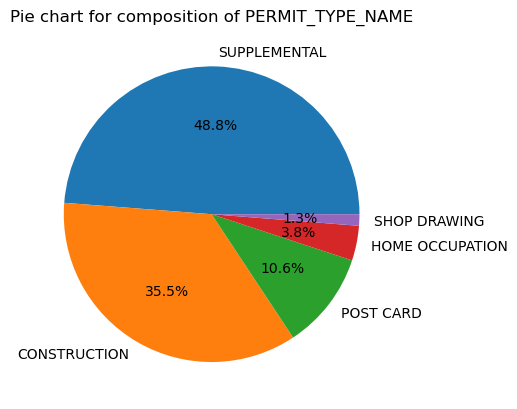

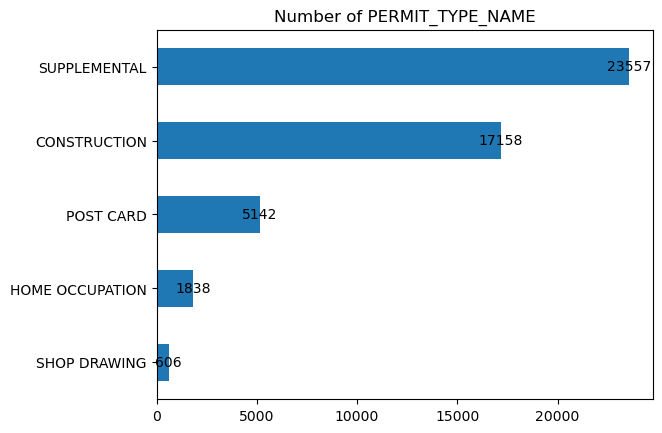

The pie chart shows that 35.5% of building-permits are construction which is the number 17158
PERMIT_TYPE_NAME classification: ['SUPPLEMENTAL' 'POST CARD' 'CONSTRUCTION' 'HOME OCCUPATION'
 'SHOP DRAWING']


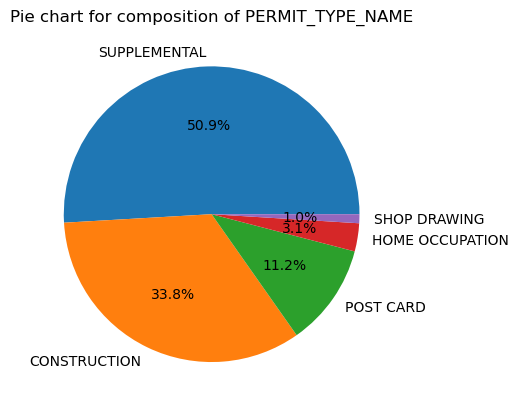

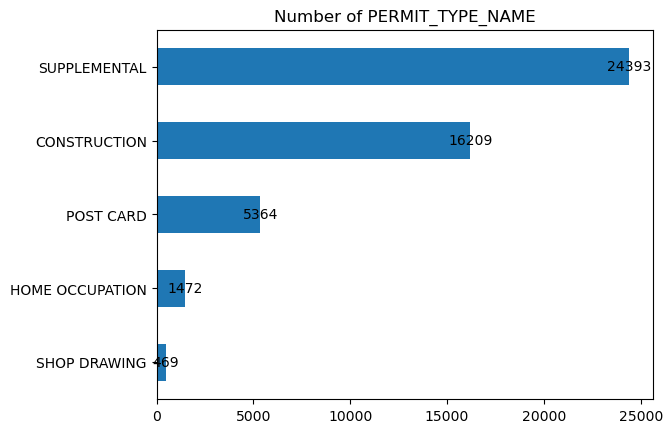

The pie chart shows that 33.8% of building-permits are construction in 2022, which is the number 16209
PERMIT_TYPE_NAME classification: ['SUPPLEMENTAL' 'CONSTRUCTION' 'POST CARD' 'SHOP DRAWING'
 'HOME OCCUPATION']


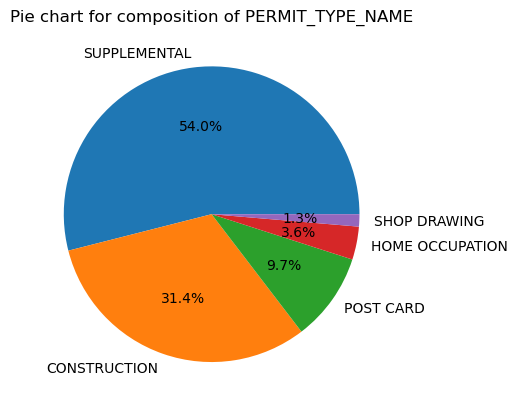

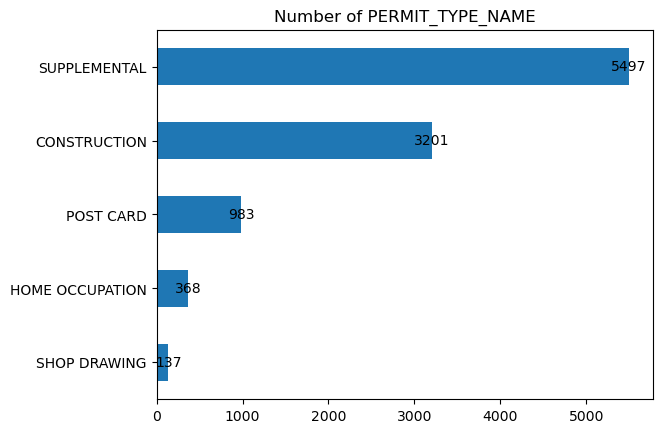

The pie chart shows that 31.4% of building-permits are construction in 2023, which is the number 3201
It seem that the proportion of construction is decreasing, however the data in 2023 is not complete.


In [11]:
## 2.4 we now observe the PERMIT_TYPE_NAME data.
df_PERMIT_TYPE_NAME = copy.deepcopy(df['PERMIT_TYPE_NAME'])
print('PERMIT_TYPE_NAME classification:',df_PERMIT_TYPE_NAME.unique())
value_counts = df_PERMIT_TYPE_NAME.value_counts()
# print(value_counts)
plt.pie(value_counts,labels = value_counts.index, autopct='%1.1f%%')
plt.title('Pie chart for composition of PERMIT_TYPE_NAME')
plt.show()

df_sorted = value_counts.sort_values(ascending=True)
# print(value_counts)
fig, ax = plt.subplots()
df_sorted.plot(kind = 'barh')
# ax.barh(df_sorted.index, df_sorted)
for i, v in enumerate(df_sorted):
    ax.text(v + 0.1, i, str(v), ha='center', va='center')
plt.title('Number of PERMIT_TYPE_NAME')
plt.show()
print('The pie chart shows that 35.5% of building-permits are construction which is the number 17158')



df_PERMIT_TYPE_NAME = copy.deepcopy(df_2022['PERMIT_TYPE_NAME'])
print('PERMIT_TYPE_NAME classification:',df_PERMIT_TYPE_NAME.unique())
value_counts = df_PERMIT_TYPE_NAME.value_counts()
# print(value_counts)
plt.pie(value_counts,labels = value_counts.index, autopct='%1.1f%%')
plt.title('Pie chart for composition of PERMIT_TYPE_NAME')
plt.show()

df_sorted = value_counts.sort_values(ascending=True)
# print(value_counts)
fig, ax = plt.subplots()
df_sorted.plot(kind = 'barh')
# ax.barh(df_sorted.index, df_sorted)
for i, v in enumerate(df_sorted):
    ax.text(v + 0.1, i, str(v), ha='center', va='center')
plt.title('Number of PERMIT_TYPE_NAME')
plt.show()
print('The pie chart shows that 33.8% of building-permits are construction in 2022, which is the number 16209')


df_PERMIT_TYPE_NAME = copy.deepcopy(df_2023['PERMIT_TYPE_NAME'])
print('PERMIT_TYPE_NAME classification:',df_PERMIT_TYPE_NAME.unique())
value_counts = df_PERMIT_TYPE_NAME.value_counts()
# print(value_counts)
plt.pie(value_counts,labels = value_counts.index, autopct='%1.1f%%')
plt.title('Pie chart for composition of PERMIT_TYPE_NAME')
plt.show()

df_sorted = value_counts.sort_values(ascending=True)
# print(value_counts)
fig, ax = plt.subplots()
df_sorted.plot(kind = 'barh')
# ax.barh(df_sorted.index, df_sorted)
for i, v in enumerate(df_sorted):
    ax.text(v + 0.1, i, str(v), ha='center', va='center')
plt.title('Number of PERMIT_TYPE_NAME')
plt.show()
print('The pie chart shows that 31.4% of building-permits are construction in 2023, which is the number 3201')
print('It seem that the proportion of construction is decreasing, however the data in 2023 is not complete.')

<class 'pandas.core.frame.DataFrame'>


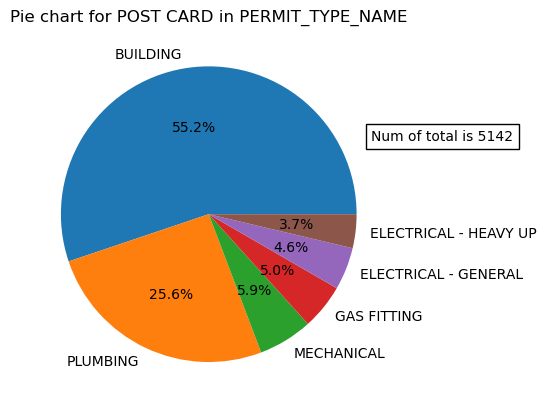

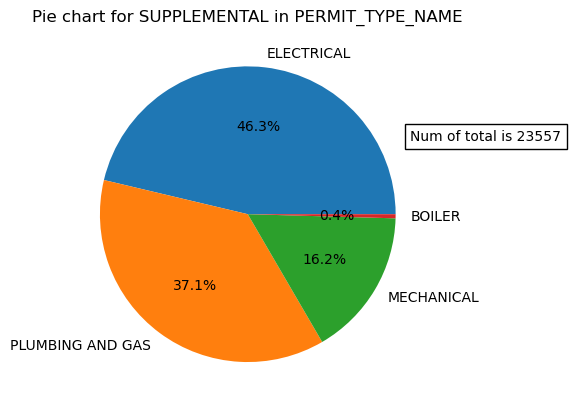

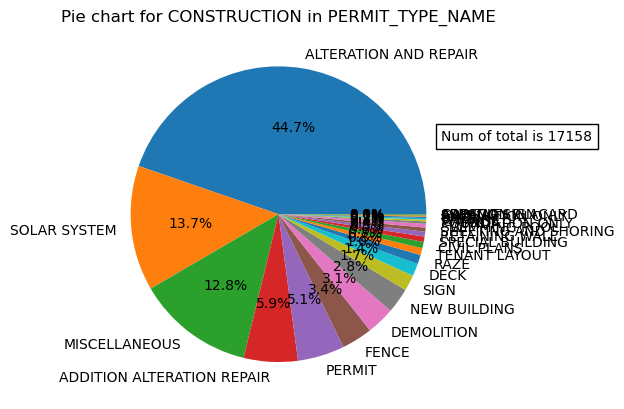

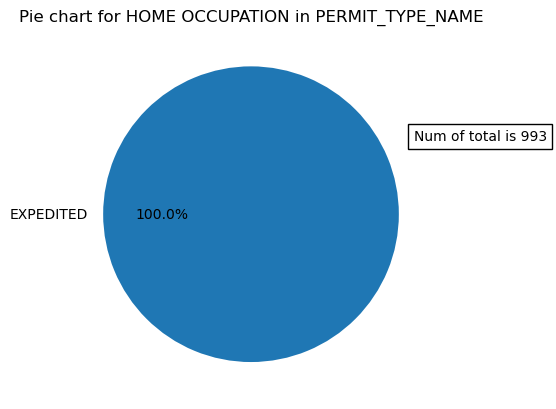

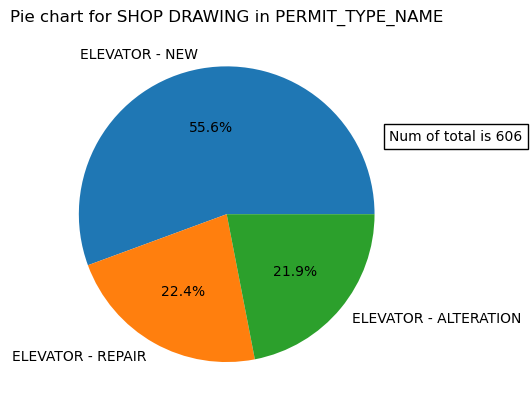

we redo for construction.


In [12]:
## 2.5 we now observe the PERMIT_SUBTYPE_NAME data.
df_PERMIT_SUBTYPE_NAME = {}
print(type(df))
for index, row in df.iterrows():  # initialize
    df_PERMIT_SUBTYPE_NAME[row.PERMIT_TYPE_NAME] = []
for index, row in df.iterrows():    
    df_PERMIT_SUBTYPE_NAME[row.PERMIT_TYPE_NAME].append(row.PERMIT_SUBTYPE_NAME)

value_counts,count = {},0
for i in df_PERMIT_SUBTYPE_NAME.keys():
    df_PERMIT_SUBTYPE_NAME_series = pd.Series(df_PERMIT_SUBTYPE_NAME[i])
    value_counts[i] = df_PERMIT_SUBTYPE_NAME_series.value_counts()
    count = sum(value_counts[i])
    plt.pie(value_counts[i],labels = value_counts[i].index, autopct='%1.1f%%')
    plt.title(f'Pie chart for {i} in PERMIT_TYPE_NAME')
    plt.annotate(f"Num of total is {count}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(1.1, 0.5))
    plt.show()
print('we redo for construction.')

<ipython-input-13-52c06dbc6ef9>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_value_counts_construction = value_counts_construction[index].append(sum_others)


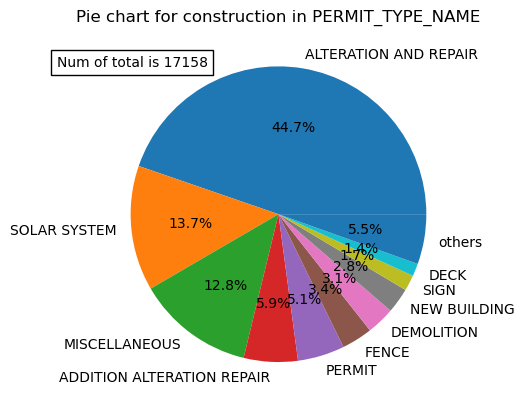

The propotions of items in others are less than 1.4%.
others: ['RAZE' 'TENANT LAYOUT' 'CIVIL PLANS' 'SPECIAL BUILDING' 'RETAINING WALL'
 'SHEETING AND SHORING' 'SWIMMING POOL' 'FOUNDATION ONLY' 'GARAGE'
 'VARIANCE' 'SHED' 'EXCAVATION ONLY' 'AWNING' 'ADDITION' 'SPECIAL SIGN'
 'CAPACITY PLACARD']


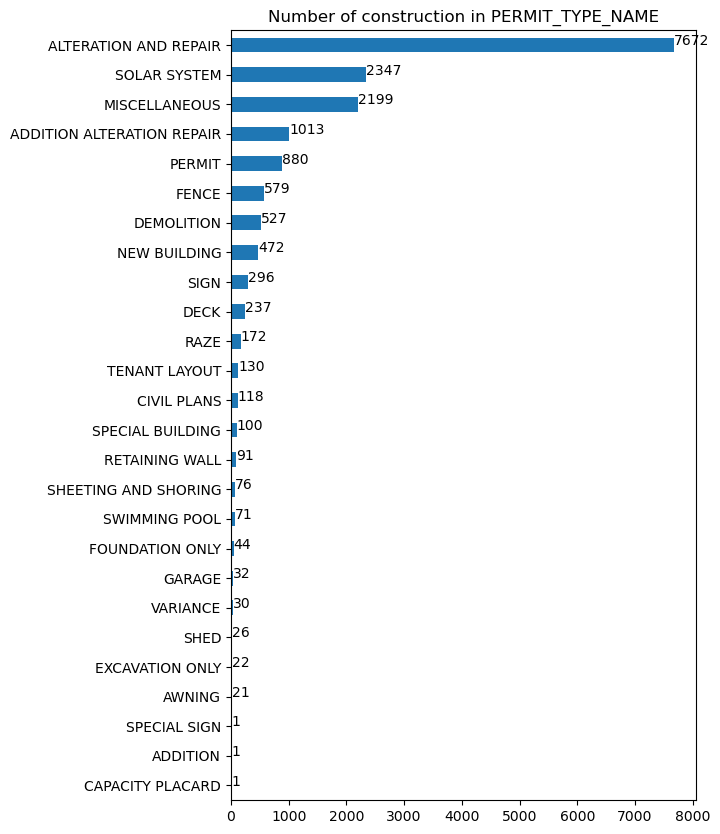

In [13]:
## for construction in  the pie charts, we redo it.
value_counts_construction = copy.deepcopy(value_counts['CONSTRUCTION'])
value_counts_construction.sort_values()
count = sum(value_counts_construction)
# print(value_counts_construction)
others, index = copy.deepcopy(value_counts_construction.index[10:]), copy.deepcopy(value_counts_construction.index[0:10])
# print(sum(value_counts_construction[others]),value_counts_construction[index])
sum_others = pd.Series([sum(value_counts_construction[others])])
sum_others.index = ['others']
new_value_counts_construction = value_counts_construction[index].append(sum_others)
plt.pie(new_value_counts_construction,labels = new_value_counts_construction.index, autopct='%1.1f%%')
plt.annotate(f"Num of total is {count}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(-1.5, 1))
plt.title(f'Pie chart for construction in PERMIT_TYPE_NAME')
plt.show()
print('The propotions of items in others are less than 1.4%.')
print('others:',others.values[:])

df_sorted = value_counts_construction.sort_values(ascending=True)
# print(value_counts)
fig, ax = plt.subplots()
fig.set_size_inches(6, 10)
df_sorted.plot(kind = 'barh')
# ax.barh(df_sorted.index, df_sorted)
for i, v in enumerate(df_sorted):
    ax.text(v - 1.5, i, str(v))
plt.title('Number of construction in PERMIT_TYPE_NAME')
plt.show()

<class 'pandas.core.frame.DataFrame'>


<ipython-input-14-6ad6a30be2f8>:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_value_counts_construction = value_counts_construction[index].append(sum_others)


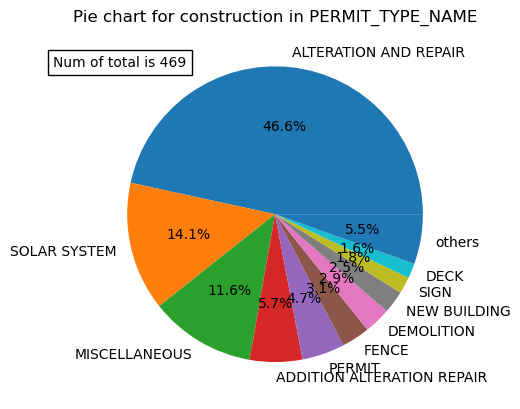

The propotions of items in others are less than 1.6%.
others: ['TENANT LAYOUT' 'RAZE' 'CIVIL PLANS' 'RETAINING WALL' 'SPECIAL BUILDING'
 'SWIMMING POOL' 'SHEETING AND SHORING' 'FOUNDATION ONLY' 'SHED' 'GARAGE'
 'VARIANCE' 'AWNING' 'EXCAVATION ONLY' 'ADDITION' 'SPECIAL SIGN'
 'CAPACITY PLACARD']


In [14]:
##do the redo for construction for 2022
df_PERMIT_SUBTYPE_NAME = {}
print(type(df))
for index, row in df_2022.iterrows():  # initialize
    df_PERMIT_SUBTYPE_NAME[row.PERMIT_TYPE_NAME] = []
for index, row in df_2022.iterrows():    
    df_PERMIT_SUBTYPE_NAME[row.PERMIT_TYPE_NAME].append(row.PERMIT_SUBTYPE_NAME)
value_counts = {}
for i in df_PERMIT_SUBTYPE_NAME.keys():
    df_PERMIT_SUBTYPE_NAME_series = pd.Series(df_PERMIT_SUBTYPE_NAME[i])
    value_counts[i] = df_PERMIT_SUBTYPE_NAME_series.value_counts()
    count = sum(value_counts[i])
value_counts_construction = copy.deepcopy(value_counts['CONSTRUCTION'])
value_counts_construction.sort_values()
others, index = copy.deepcopy(value_counts_construction.index[10:]), copy.deepcopy(value_counts_construction.index[0:10])
# print(sum(value_counts_construction[others]),value_counts_construction[index])
sum_others = pd.Series([sum(value_counts_construction[others])])
sum_others.index = ['others']
new_value_counts_construction = value_counts_construction[index].append(sum_others)
plt.pie(new_value_counts_construction,labels = new_value_counts_construction.index, autopct='%1.1f%%')
plt.annotate(f"Num of total is {count}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(-1.5, 1))
plt.title(f'Pie chart for construction in PERMIT_TYPE_NAME')
plt.show()
print('The propotions of items in others are less than 1.6%.')
print('others:',others.values[:])

<class 'pandas.core.frame.DataFrame'>


<ipython-input-15-10a5d09528fa>:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_value_counts_construction = value_counts_construction[index].append(sum_others)


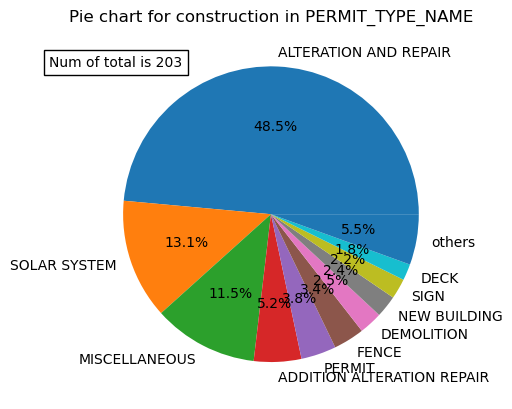

The propotions of items in others are less than 1.6%.
others: ['TENANT LAYOUT' 'RAZE' 'CIVIL PLANS' 'SPECIAL BUILDING'
 'SHEETING AND SHORING' 'RETAINING WALL' 'SWIMMING POOL' 'FOUNDATION ONLY'
 'VARIANCE' 'EXCAVATION ONLY' 'AWNING' 'GARAGE' 'SHED']
There seems little change for proportions in construction.


In [15]:
##do the redo for construction for 2023
df_PERMIT_SUBTYPE_NAME = {}
print(type(df))
for index, row in df_2023.iterrows():  # initialize
    df_PERMIT_SUBTYPE_NAME[row.PERMIT_TYPE_NAME] = []
for index, row in df_2023.iterrows():    
    df_PERMIT_SUBTYPE_NAME[row.PERMIT_TYPE_NAME].append(row.PERMIT_SUBTYPE_NAME)
value_counts = {}
for i in df_PERMIT_SUBTYPE_NAME.keys():
    df_PERMIT_SUBTYPE_NAME_series = pd.Series(df_PERMIT_SUBTYPE_NAME[i])
    value_counts[i] = df_PERMIT_SUBTYPE_NAME_series.value_counts()
    count = sum(value_counts[i])
value_counts_construction = copy.deepcopy(value_counts['CONSTRUCTION'])
value_counts_construction.sort_values()
others, index = copy.deepcopy(value_counts_construction.index[10:]), copy.deepcopy(value_counts_construction.index[0:10])
# print(sum(value_counts_construction[others]),value_counts_construction[index])
sum_others = pd.Series([sum(value_counts_construction[others])])
sum_others.index = ['others']
new_value_counts_construction = value_counts_construction[index].append(sum_others)
plt.pie(new_value_counts_construction,labels = new_value_counts_construction.index, autopct='%1.1f%%')
plt.annotate(f"Num of total is {count}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(-1.5, 1))
plt.title(f'Pie chart for construction in PERMIT_TYPE_NAME')
plt.show()
print('The propotions of items in others are less than 1.6%.')
print('others:',others.values[:])
print('There seems little change for proportions in construction.')

<ipython-input-16-2dd6ba8974ac>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_value_counts_CATEGORY_NAME = value_counts_CATEGORY_NAME[index].append(sum_others)


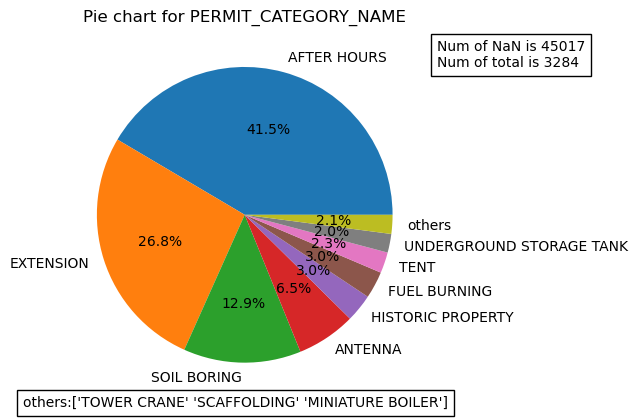

others: ['TOWER CRANE' 'SCAFFOLDING' 'MINIATURE BOILER']


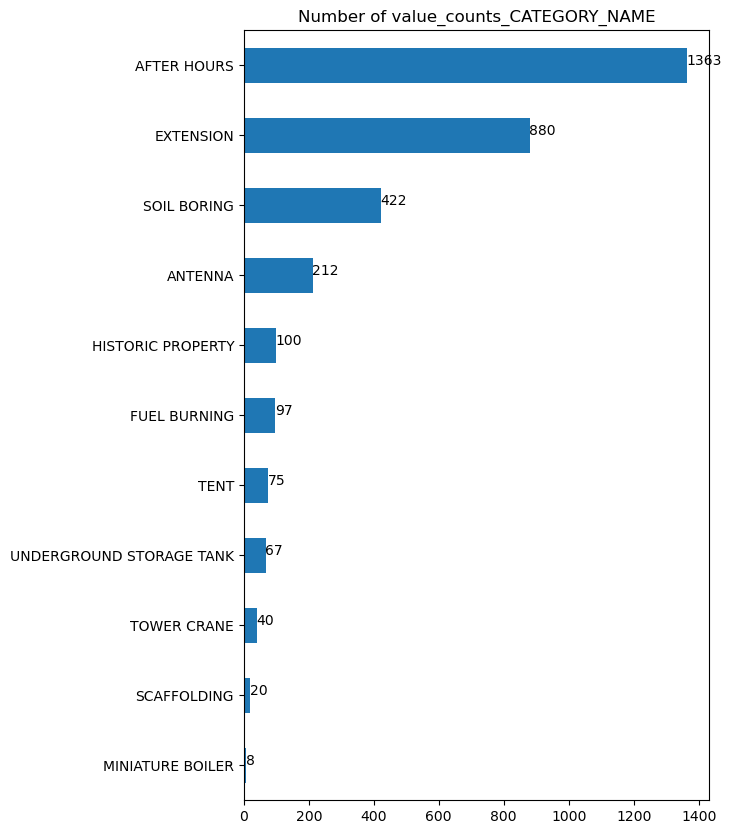

In [16]:
## 2.6 PERMIT_CATEGORY_NAME
value_counts_CATEGORY_NAME = df.PERMIT_CATEGORY_NAME.value_counts()
count = 0
# print(np.isnan(df.PERMIT_CATEGORY_NAME[0]))
others, index = copy.deepcopy(value_counts_CATEGORY_NAME.index[8:]), copy.deepcopy(value_counts_CATEGORY_NAME.index[0:8])
sum_others = pd.Series([sum(value_counts_CATEGORY_NAME[others])])
sum_others.index = ['others']
new_value_counts_CATEGORY_NAME = value_counts_CATEGORY_NAME[index].append(sum_others)
count1 = sum(value_counts_CATEGORY_NAME)
for i in df.PERMIT_CATEGORY_NAME:
    if pd.isnull(i) == True:
        count += 1
# fig = plt.figure(figsize=(5, 5))
plt.pie(new_value_counts_CATEGORY_NAME,labels = new_value_counts_CATEGORY_NAME.index, autopct='%1.1f%%')
plt.title(f'Pie chart for PERMIT_CATEGORY_NAME')
plt.annotate(f"Num of NaN is {count}\nNum of total is {count1}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(1.3, 1))
plt.annotate(f'others:{others.values[:]}', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(-1.5, -1.3))
plt.show()
print('others:',others.values[:])

df_sorted = value_counts_CATEGORY_NAME.sort_values(ascending=True)
# print(value_counts)
fig, ax = plt.subplots()
fig.set_size_inches(6, 10)
df_sorted.plot(kind = 'barh')
# ax.barh(df_sorted.index, df_sorted)
for i, v in enumerate(df_sorted):
    ax.text(v - 1.5, i, str(v))
plt.title('Number of value_counts_CATEGORY_NAME')
plt.show()

In [17]:
## 2.8 radius plot with position
## Heat map for building_permits.
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import HeatMap

dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

HeatMap(data=df[['LATITUDE', 'LONGITUDE']].groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().values.tolist(), radius=8, max_zoom=13,gradient={0.1:'blue',0.3:'lime',0.5:'yellow',0.7:'orange',0.9:'red'}).add_to(dc_map)

dc_map

In [18]:
## Heat map for construction.
HeatMap(data=df_construction[['LATITUDE', 'LONGITUDE']].groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().values.tolist(), radius=8, max_zoom=13,gradient={0.1:'blue',0.3:'lime',0.5:'yellow',0.7:'orange',0.9:'red'}).add_to(dc_map)

dc_map

In [19]:
## 2.10 PERMIT_APPLICANT
count = 0
for i in df.PERMIT_APPLICANT:
    if pd.isnull(i) == False:
        count += 1
print('There are {:.2f}% of the building-permits have PERMIT_APPLICANT in table, others are empty.'.format(count/len(df)*100))

##for construction
count = 0
for i in df_construction.PERMIT_APPLICANT:
    if pd.isnull(i) == False:
        count += 1
print('There are {:.2f}% of the construction have PERMIT_APPLICANT in table, others are empty.'.format(count/len(df)*100))

There are 47.26% of the building-permits have PERMIT_APPLICANT in table, others are empty.
There are 33.60% of the construction have PERMIT_APPLICANT in table, others are empty.


In [20]:
## 2.11 FEES_PAID
count1,count2 = 0,0
for i in df.FEES_PAID:
    if pd.isnull(i) == True:
        count1 += 1
    if i == 0:
        count2 += 1
print(f"There are {count1} of NaN data in FEES_PAID, and {count2} of them haven't paid yet for building-permits.")

##for construction
count1,count2 = 0,0
for i in df_construction.FEES_PAID:
    if pd.isnull(i) == True:
        count1 += 1
    if i == 0:
        count2 += 1
print(f"There are {count1} of NaN data in FEES_PAID, and {count2} of them haven't paid yet for construction.")

There are 0 of NaN data in FEES_PAID, and 796 of them haven't paid yet for building-permits.
There are 0 of NaN data in FEES_PAID, and 346 of them haven't paid yet for construction.


In [21]:
## 2.12 OWNER_NAME
count = 0
for i in df.OWNER_NAME:
    if pd.isnull(i) == False:
        count += 1
print('There are {:.2f}% of the building-permits have a owner or more in table, others are empty.'.format(count/len(df)*100))

##for construction
count = 0
for i in df_construction.OWNER_NAME:
    if pd.isnull(i) == False:
        count += 1
print('There are {:.2f}% of the construction have a owner or more in table, others are empty.'.format(count/len(df)*100))

There are 94.47% of the building-permits have a owner or more in table, others are empty.
There are 33.07% of the construction have a owner or more in table, others are empty.


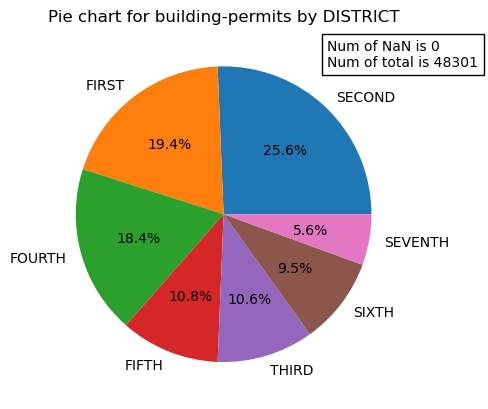

It shows that there are the first, second and fourth district has more building-permit than others.


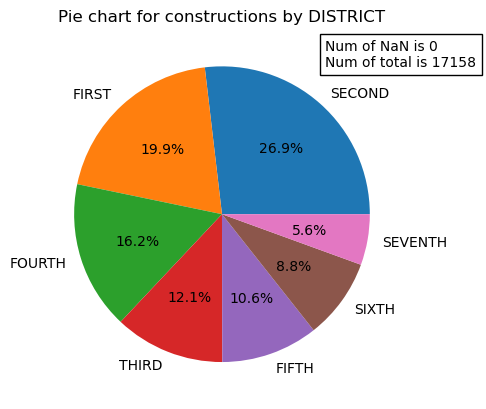

It shows that there are the first, second and fourth district has more construction than others. The proportions for building-permits and constructions are similar.


In [22]:
## 2.13 DISTRICT
value_DISTRICT = df.DISTRICT.value_counts()
count1, count2 = 0, 0
count2 = sum(value_DISTRICT)
for i in df.DISTRICT:
    if pd.isnull(i) == True:
        count1 += 1
plt.pie(value_DISTRICT,labels = value_DISTRICT.index, autopct='%1.1f%%')
plt.title(f'Pie chart for building-permits by DISTRICT')
plt.annotate(f"Num of NaN is {count1}\nNum of total is {count2}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(0.7, 1))
plt.show()
print('It shows that there are the first, second and fourth district has more building-permit than others.')

##for construction
value_DISTRICT = df_construction.DISTRICT.value_counts()
count1, count2 = 0, 0
count2 = sum(value_DISTRICT)
for i in df.DISTRICT:
    if pd.isnull(i) == True:
        count1 += 1
plt.pie(value_DISTRICT,labels = value_DISTRICT.index, autopct='%1.1f%%')
plt.title(f'Pie chart for constructions by DISTRICT')
plt.annotate(f"Num of NaN is {count1}\nNum of total is {count2}", fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black'),xy=(0,1),xytext=(0.7, 1))
plt.show()
print('It shows that there are the first, second and fourth district has more construction than others. The proportions for building-permits and constructions are similar.')

<ipython-input-23-c9bfd57b2d3a>:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_value_counts_NEIGHBORHOODCLUSTER = value_counts_NEIGHBORHOODCLUSTER[index].append(sum_others)


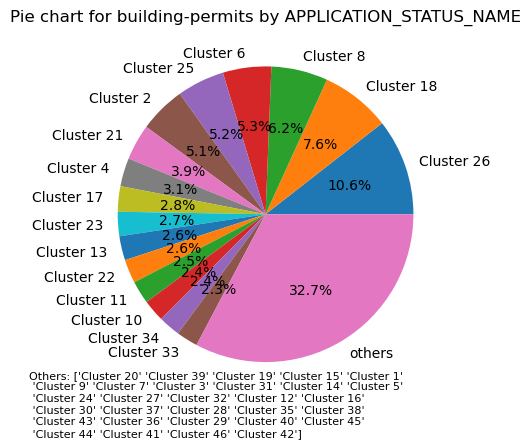

<ipython-input-23-c9bfd57b2d3a>:30: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_value_counts_NEIGHBORHOODCLUSTER = value_counts_NEIGHBORHOODCLUSTER[index].append(sum_others)


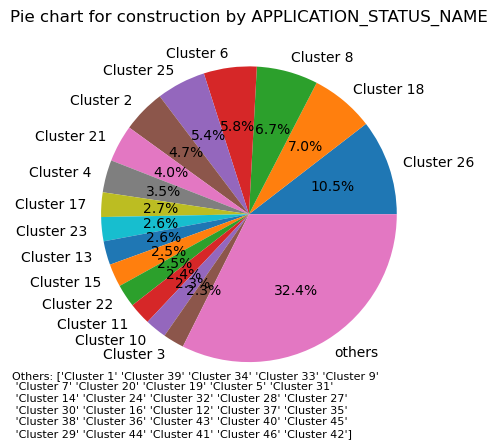

The ranking in building-permits and construction changes after ranking 11th. The cluster 26,18,8 has the most of the constructions


In [23]:
## 2.14 NEIGHBORHOODCLUSTER
value_counts_NEIGHBORHOODCLUSTER = df.NEIGHBORHOODCLUSTER.value_counts()
count = 0
for i in df.NEIGHBORHOODCLUSTER:
    if pd.isnull(i) == True:
        count += 1
# print(f"Num of NaN is {count}")
others, index = copy.deepcopy(value_counts_NEIGHBORHOODCLUSTER.index[16:]), copy.deepcopy(value_counts_NEIGHBORHOODCLUSTER.index[0:16])
# print('others:',others)
sum_others = pd.Series([sum(value_counts_NEIGHBORHOODCLUSTER[others])])
sum_others.index = ['others']
new_value_counts_NEIGHBORHOODCLUSTER = value_counts_NEIGHBORHOODCLUSTER[index].append(sum_others)
plt.pie(new_value_counts_NEIGHBORHOODCLUSTER,labels = new_value_counts_NEIGHBORHOODCLUSTER.index, autopct='%1.1f%%')
plt.title(f'Pie chart for building-permits by APPLICATION_STATUS_NAME')
plt.annotate(f"Others: {others.values}", fontsize=8, color='black', xy=(0,1),xytext=(-1.6, -1.5))
plt.show()

##for construction
value_counts_NEIGHBORHOODCLUSTER = df_construction.NEIGHBORHOODCLUSTER.value_counts()
count = 0
for i in df_construction.NEIGHBORHOODCLUSTER:
    if pd.isnull(i) == True:
        count += 1
# print(f"Num of NaN is {count}")
others, index = copy.deepcopy(value_counts_NEIGHBORHOODCLUSTER.index[16:]), copy.deepcopy(value_counts_NEIGHBORHOODCLUSTER.index[0:16])
# print('others:',others)
sum_others = pd.Series([sum(value_counts_NEIGHBORHOODCLUSTER[others])])
sum_others.index = ['others']
new_value_counts_NEIGHBORHOODCLUSTER = value_counts_NEIGHBORHOODCLUSTER[index].append(sum_others)
plt.pie(new_value_counts_NEIGHBORHOODCLUSTER,labels = new_value_counts_NEIGHBORHOODCLUSTER.index, autopct='%1.1f%%')
plt.title(f'Pie chart for construction by APPLICATION_STATUS_NAME')
plt.annotate(f"Others: {others.values}", fontsize=8, color='black', xy=(0,1),xytext=(-1.6, -1.5))
plt.show()
print('The ranking in building-permits and construction changes after ranking 11th. The cluster 26,18,8 has the most of the constructions')

In [24]:
##3) other plot and multi-variables analyze.

## 3.1 position varaibles X_Y and LONGITUDE_LATITUDE analyze.
X = np.array(df['X'])
Y = np.array(df['Y'])
LONGITUDE = np.array(df['LONGITUDE'])
LATITUDE = np.array(df['LATITUDE'])
X_Y = np.concatenate((X.reshape(-1, 1), Y.reshape(-1, 1)), axis=1)
LONGITUDE_LATITUDE = np.concatenate((LONGITUDE.reshape(-1, 1), LATITUDE.reshape(-1, 1)), axis=1)
# print(X_Y[:5], LONGITUDE_LATITUDE[:5])

from scipy.stats import normaltest
from scipy import stats
stat_X_Y, p_X_Y = stats.shapiro(X_Y)
stat_LONGITUDE_LATITUDE, p_LONGITUDE_LATITUDE = stats.shapiro(LONGITUDE_LATITUDE)
stat_X, p_X = stats.shapiro(X)
stat_LONGITUDE, p_LONGITUDE = stats.shapiro(LONGITUDE)
stat_Y, p_Y = stats.shapiro(Y)
stat_LATITUDE, p_LATITUDE = stats.shapiro(LATITUDE)
if p_X_Y > 0.05 and p_LONGITUDE_LATITUDE > 0.05:
    print("We find that the two two-elemnet-stats X_Y and  LONGITUDE_LATITUDE obey normal distribution.")
else:
    print("We find that the two two-elemnet-stats X_Y and  LONGITUDE_LATITUDE do not obey normal distribution,but because the amount of data is large enough, we assume that it is normally distrubuted.")
print('p-value for X:',p_X,',p-value for LONGITUDE',p_LONGITUDE,',p-value for Y',p_Y,',p-value for LATITUDE',p_LATITUDE, 'Every one of them do not obey normal distribution, as well.')

from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(X, LONGITUDE)
print(f"Because p-value:{p_value}>0.05, we believe that X and LONGITUDE have no difference.")
print(f"Because the maximum distance of X and LONGITUDE is {max(abs(X-LONGITUDE))*111000} meter(as 1degree is 111km), we believe there are no difference between them.")
t_statistic, p_value = ttest_ind(Y, LATITUDE)
print(f"Because p-value:{p_value}>0.05, we believe that Y and LATITUDE have no difference.")
print(f"Because the maximum distance of X and LONGITUDE is {max(abs(Y-LATITUDE))*111000} meter(as 1degree is 111km), we believe there are no difference between them.")

#consider yeojohnson transformation? How to do 2-demensional t-test?!!

We find that the two two-elemnet-stats X_Y and  LONGITUDE_LATITUDE do not obey normal distribution,but because the amount of data is large enough, we assume that it is normally distrubuted.
p-value for X: 0.0 ,p-value for LONGITUDE 0.0 ,p-value for Y 8.646011524884121e-43 ,p-value for LATITUDE 8.57594660166788e-43 Every one of them do not obey normal distribution, as well.
Because p-value:0.9924114165509489>0.05, we believe that X and LONGITUDE have no difference.
Because the maximum distance of X and LONGITUDE is 0.2580238065661433 meter(as 1degree is 111km), we believe there are no difference between them.
Because p-value:0.9700610590243042>0.05, we believe that Y and LATITUDE have no difference.
Because the maximum distance of X and LONGITUDE is 0.8667890658458077 meter(as 1degree is 111km), we believe there are no difference between them.


f:\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<ipython-input-25-36dd53d55ca9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['ISSUE_DATE'][i] = df11['ISSUE_DATE'][i][5:7]


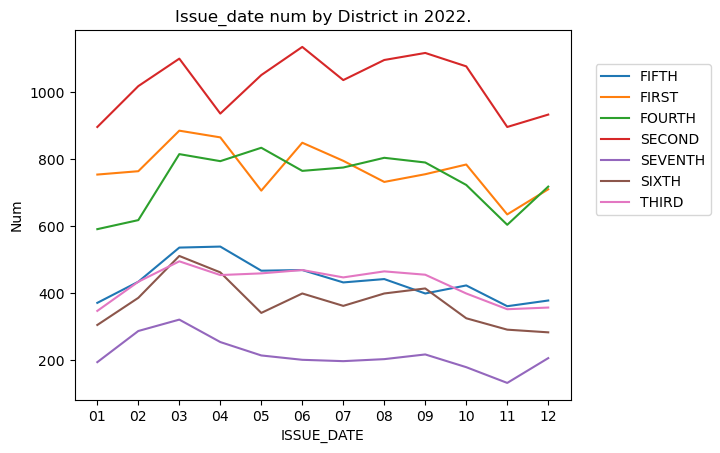

In [25]:
##4) analyze the influnce by DISTRICT.
df11 = copy.deepcopy(df_2022)
for i in range(len(df11)):
    df11['ISSUE_DATE'][i] = df11['ISSUE_DATE'][i][5:7]
df21 = df11[['ISSUE_DATE','DISTRICT']]
data = df21.value_counts()
# print(data.index[0])
data_t = {'ISSUE_DATE':[],'DISTRICT':[],'Num':[]}
for i in range(len(data)):
    data_t['ISSUE_DATE'].append(data.index[i][0])
    data_t['DISTRICT'].append(data.index[i][1])
    data_t['Num'].append(data[i])
# print(data_t)
data_t1 = pd.DataFrame(data_t)
data_t1_sorted = data_t1.sort_values(by = ["ISSUE_DATE", "DISTRICT"])
# print(data_t1_sorted)
##picture
sns.lineplot(data = data_t1_sorted, x = 'ISSUE_DATE', hue = 'DISTRICT', y = 'Num')
plt.legend(loc = (1.05,0.5))
plt.title('Issue_date num by District in 2022.')
plt.show()

In [26]:
df11 = copy.deepcopy(df_2022)
for i in range(len(df11)):
    df11['ISSUE_DATE'][i] = df11['ISSUE_DATE'][i][5:7]
df21 = df11[['ISSUE_DATE','NEIGHBORHOODCLUSTER']]
data = df21.value_counts()
# print(data.index[0])
data_t = {'ISSUE_DATE':[],'NEIGHBORHOODCLUSTER':[],'Num':[]}
for i in range(len(data)):
    data_t['ISSUE_DATE'].append(data.index[i][0])
    data_t['NEIGHBORHOODCLUSTER'].append(data.index[i][1])
    data_t['Num'].append(data[i])
# print(data_t)
data_t1 = pd.DataFrame(data_t)
data_t1_sorted = data_t1.sort_values(by = ["ISSUE_DATE", "NEIGHBORHOODCLUSTER"])
# print(data_t1_sorted)

<ipython-input-26-10417ed931d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['ISSUE_DATE'][i] = df11['ISSUE_DATE'][i][5:7]


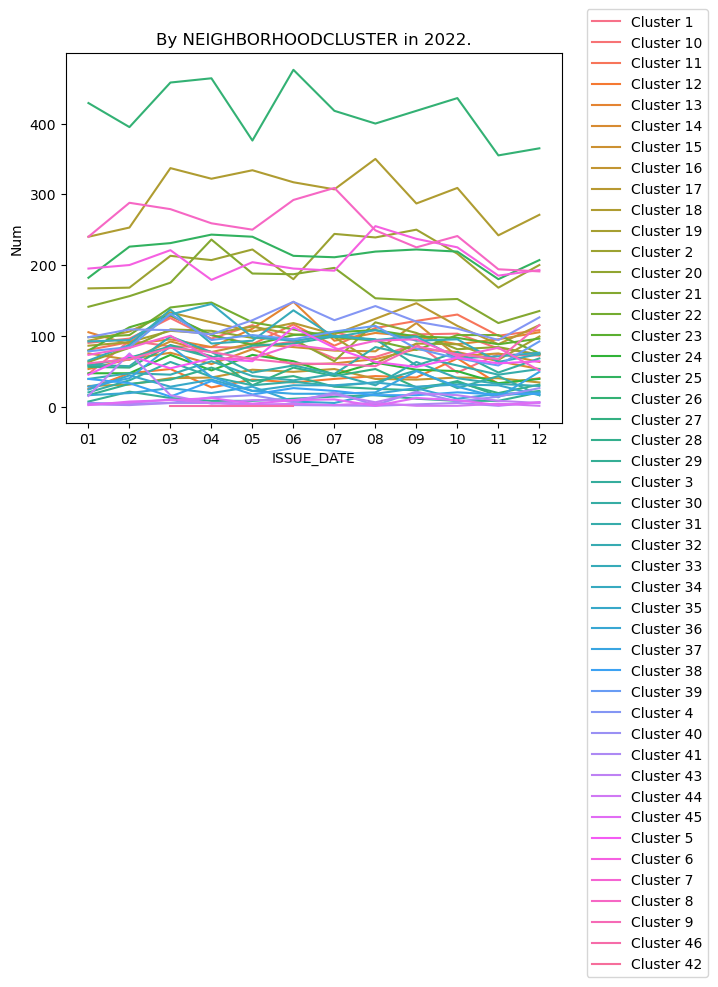

In [27]:
sns.lineplot(data = data_t1_sorted, x = 'ISSUE_DATE', hue = 'NEIGHBORHOODCLUSTER', y = 'Num')
plt.legend(loc = (1.05,-1.5))
plt.title('By NEIGHBORHOODCLUSTER in 2022.')
plt.show()

  ISSUE_DATE NEIGHBORHOODCLUSTER  Num
4         01          Cluster 26  429
8         02          Cluster 26  395
2         03          Cluster 26  458
1         04          Cluster 26  464
9         05          Cluster 26  376


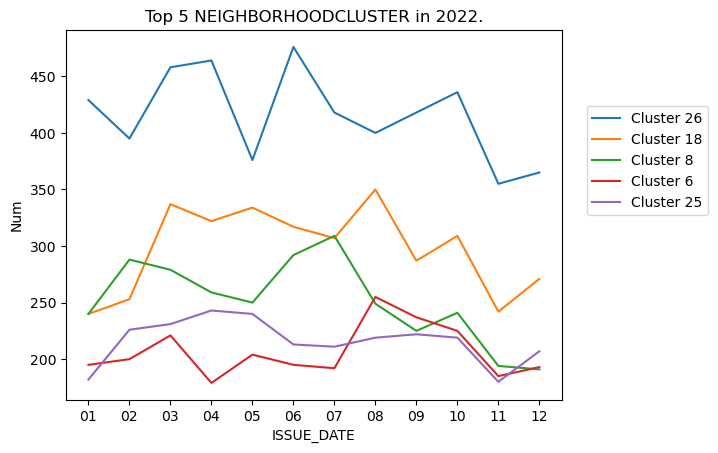

In [28]:
data_t1_sorted_26 = data_t1_sorted[data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 26']
data_t1_sorted_18 = data_t1_sorted[data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 18']
data_t1_sorted_8 = data_t1_sorted[data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 8']
data_t1_sorted_6 = data_t1_sorted[data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 6']
data_t1_sorted_25 = data_t1_sorted[data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 25']
data_t2 = pd.concat([data_t1_sorted_26,data_t1_sorted_18,data_t1_sorted_8,data_t1_sorted_6,data_t1_sorted_25],axis = 0)
print(data_t2.head())
# data_t2 = data_t1_sorted[data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 26' or data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 18' or data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 8' or data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 6' or data_t1_sorted['NEIGHBORHOODCLUSTER'] == 'Cluster 25']
sns.lineplot(data = data_t2, x = 'ISSUE_DATE', hue = 'NEIGHBORHOODCLUSTER', y = 'Num')
plt.legend(loc = (1.05,0.5))
plt.title('Top 5 NEIGHBORHOODCLUSTER in 2022.')
plt.show()

In [29]:
##5) Correlation  
df1 = copy.deepcopy(df)
df2 = df1.corr()
print(df2)
strong_corr = []
for i in range(1,len(df2)):
    for j in range(i+1,len(df2)):
        # print(df2.index[i])
        if abs(df2[df2.index[i]][df2.index[j]]) > 0.8 :
            strong_corr.append(f'{df2.index[i]}-{df2.index[j]}')
print('\n',f'There is a strong correlation between {strong_corr}')

                        Unnamed: 0         X         Y  FEES_PAID  LATITUDE  \
Unnamed: 0                1.000000 -0.012877  0.009973   0.006802  0.009973   
X                        -0.012877  1.000000 -0.456881  -0.021142 -0.456881   
Y                         0.009973 -0.456881  1.000000  -0.021423  1.000000   
FEES_PAID                 0.006802 -0.021142 -0.021423   1.000000 -0.021424   
LATITUDE                  0.009973 -0.456881  1.000000  -0.021424  1.000000   
LONGITUDE                -0.012877  1.000000 -0.456881  -0.021142 -0.456880   
XCOORD                   -0.012880  1.000000 -0.456765  -0.021156 -0.456765   
YCOORD                    0.009971 -0.456983  1.000000  -0.021424  1.000000   
MARADDRESSREPOSITORYID   -0.006696 -0.509409  0.323264   0.037760  0.323264   
WARD                     -0.010869  0.709353 -0.548471  -0.015934 -0.548471   
PSA                      -0.023700  0.555692 -0.133837  -0.026780 -0.133836   

                        LONGITUDE    XCOORD    YCOO